In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

In [10]:
data=pd.read_csv("D:\\Source_code\\Lab\\data\\IMDB Dataset.csv")

X=data['review']
Y=data['sentiment'].map({'positive':1,'negative':0})

X.head()


0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

In [11]:
tokenizer=Tokenizer(10000,oov_token='<oov>')
tokenizer.fit_on_texts(X)

X=pad_sequences(tokenizer.texts_to_sequences(X),maxlen=150)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=42)

In [14]:
model=Sequential([
    Embedding(10000,32),
    SimpleRNN(32,activation='relu'),
    Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
logs=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=5,batch_size=64)

Epoch 1/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7179 - loss: 0.5304 - val_accuracy: 0.8445 - val_loss: 0.3675
Epoch 2/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8758 - loss: 0.2975 - val_accuracy: 0.8686 - val_loss: 0.3154
Epoch 3/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9020 - loss: 0.2418 - val_accuracy: 0.8749 - val_loss: 0.3027
Epoch 4/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9230 - loss: 0.1957 - val_accuracy: 0.8733 - val_loss: 0.3667
Epoch 5/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9363 - loss: 0.1653 - val_accuracy: 0.8752 - val_loss: 0.3259


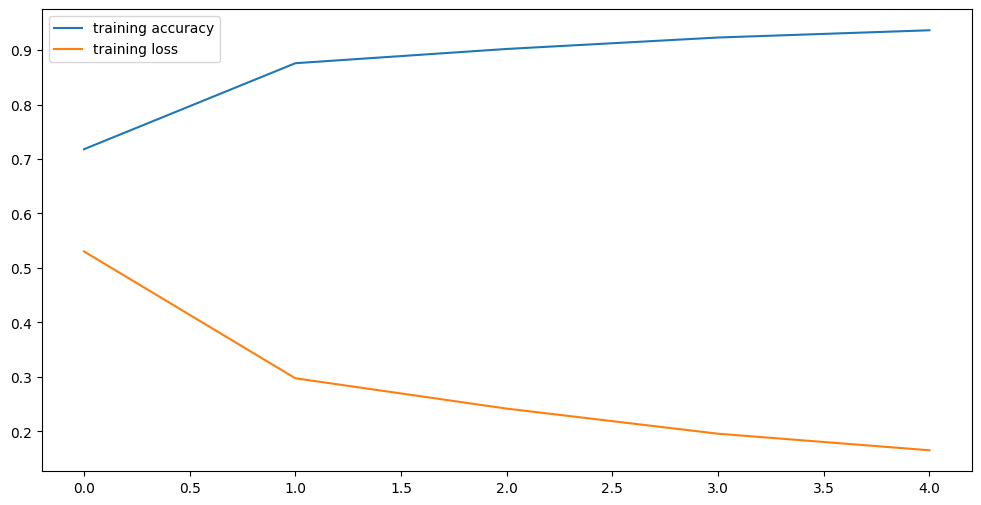

In [15]:
plt.figure(figsize=(12,6))
plt.plot(logs.history['accuracy'],label='training accuracy')
plt.plot(logs.history['loss'],label='training loss')
plt.legend()
plt.show()